add important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold ,cross_val_score ,StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
%matplotlib inline

read the training data

In [3]:
data = pd.read_csv("heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


describing the data

In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


show first 5 rows

In [5]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


count the genders

In [ ]:
gender_counts = data['Sex'].value_counts()
gender_counts

M    725
F    193
Name: Sex, dtype: int64

count the tyoes of chest pain

In [ ]:
chest = data['ChestPainType'].value_counts()
chest

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

count the people who have Heart Disease

In [6]:
Heart_Disease = data['HeartDisease'].value_counts()
Heart_Disease

1    508
0    410
Name: HeartDisease, dtype: int64

see if there is any null values


In [7]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

 view the information of the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


see if there is any duplication in the data set


In [10]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

now we need to encode the data for our model

In [29]:
encoder=LabelEncoder()

In [30]:
obj = data.select_dtypes(include='object')
not_obj = data.select_dtypes(exclude='object')

In [31]:
for i in range(0, obj.shape[1]):
  obj.iloc[:,i] = encoder.fit_transform(obj.iloc[:,i])

<ipython-input-31-bf1fde722065>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  obj.iloc[:,i] = encoder.fit_transform(obj.iloc[:,i])
<ipython-input-31-bf1fde722065>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  obj.iloc[:,i] = encoder.fit_transform(obj.iloc[:,i])
<ipython-input-31-bf1fde722065>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique

In [32]:
data_new = pd.concat([obj, not_obj], axis=1)

In [33]:
data_new.head(7)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0
5,1,2,1,0,2,39,120,339,0,170,0.0,0
6,0,1,1,0,2,45,130,237,0,170,0.0,0


we will split  the data set into x and y as dependent and independent values

In [34]:
X = data_new.drop(['HeartDisease'], axis=1)
y = data_new['HeartDisease']

In [35]:
X

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,1,1,1,0,2,40,140,289,0,172,0.0
1,0,2,1,0,1,49,160,180,0,156,1.0
2,1,1,2,0,2,37,130,283,0,98,0.0
3,0,0,1,1,1,48,138,214,0,108,1.5
4,1,2,1,0,2,54,150,195,0,122,0.0
...,...,...,...,...,...,...,...,...,...,...,...
913,1,3,1,0,1,45,110,264,0,132,1.2
914,1,0,1,0,1,68,144,193,1,141,3.4
915,1,0,1,1,1,57,130,131,0,115,1.2
916,0,1,0,0,1,57,130,236,0,174,0.0


In [36]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

we will split the dataset into training and testing

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=151)

view the shape of train and test

In [38]:
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (642, 11)
y_train shape =  (642,)
x_test shape =  (276, 11)
y_test shape =  (276,)


we will use LogisticRegression as a binary classification to predict the output


In [39]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*   we will calulate the accuracy
*   we will calulate the confusion matrix
*   we will calulate the classification report

In [40]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [41]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [42]:
cross_val_score(lr_model, x_train, y_train, cv=3, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.8271028 , 0.87383178, 0.85981308])

*   we will print the accuracy
*   we will print the confusion matrix
*   we will print the classification report

In [43]:
print('accuracy')
print(accuracy)

print('conf matrix')
print(conf_matrix)

print('class report')
print(class_report)

accuracy
0.8478260869565217
conf matrix
[[105  17]
 [ 25 129]]
class report
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       122
           1       0.88      0.84      0.86       154

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



the accuracy of the model is 85% that means the code is preforming well

now we will compare between actual data and predicting data

In [44]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame for the entire dataset
print("Results on Entire Dataset:")
print(result_df.head(50))

Results on Entire Dataset:
     Actual  Predicted
173       0          0
881       0          0
38        0          0
610       1          0
443       1          1
704       1          1
204       0          0
7         0          0
846       1          1
871       0          1
494       1          1
719       1          1
12        0          0
679       0          1
579       1          1
706       1          0
564       1          1
680       1          1
575       1          1
877       1          1
801       1          1
297       1          1
354       1          0
358       1          1
263       1          1
269       0          0
5         0          0
549       0          0
716       1          1
243       0          0
726       0          0
540       1          1
620       0          0
750       0          1
800       0          0
379       1          1
895       1          1
428       1          1
615       1          1
305       1          1
212       0          0
644    

we need to visualize the model to show the curve

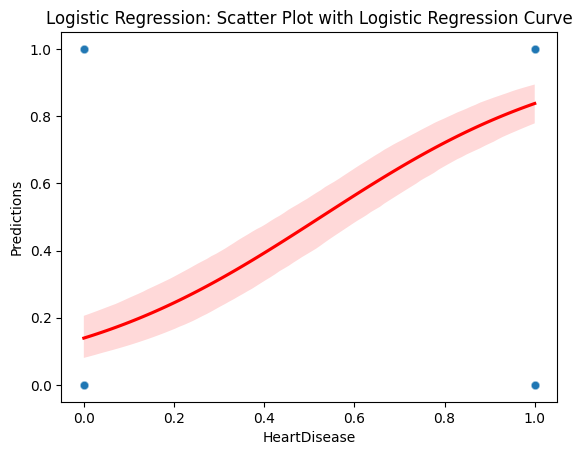

In [45]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.2)
plt.title('Logistic Regression: Scatter Plot with Logistic Regression Curve')
plt.xlabel('True Labels')
plt.ylabel('Predictions')


sns.regplot(x=y_test, y=y_pred, scatter=False, logistic=True, line_kws={'color': 'red'})

plt.show()

view the heat map to see confusion matrix

<Axes: >

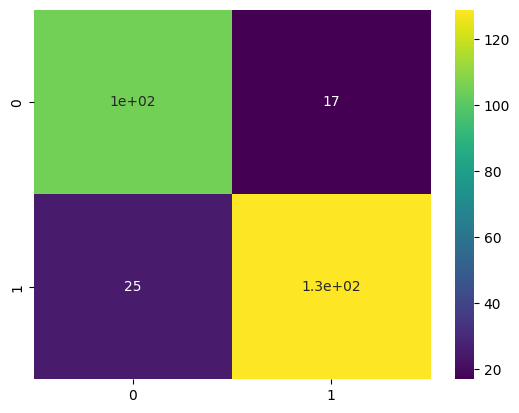

In [46]:
sns.heatmap(conf_matrix, annot=True, cmap='viridis', cbar=True)